# EDA Problem Set 1 
**Submitted by: Rosiel Jazmine T. Villareal**

The following problem set will revolve around hourly Philippine weather data observations from 1978 to 2018 sourced from NOAA (National Oceanic and Atmospheric Administration). 

The dataset `PH_Weather_v1.csv` has **11** columns. The columns are described as follows.

* **datetime** maps to a YYYYMMDDSSSS string datetime format. ('%Y%m%d%H%S')
* **wind_direction** represents the recorded compass direction of the wind. 
* **wind_speed** is the wind speed recorded in MPH.
* **gust_speed** is the gust speed recorded in MPH. NAN if no recording.
* **sea_level_pressure** is sea level pressure in millibars estimated to the nearest tenth.
* **temperature** is the recorded temperature in celsius.
* **altitude** is the station altimeter recording in inches. NAN if no recording.
* **precipitation** is the station hourly precipitation report in inches. NAN if no recording.
* **clouds** is the station observed cloud report.
    * CLR-CLEAR 
    * SCT-SCATTERED
    * BKN-BROKEN
    * OVC-OVERCAST, 
    * OBS-OBSCURED
    * POB-PARTIAL OBSCURATION 
* **visibility** is the station observed visibility in miles
* **humidity** is the station observed relative humidity

## Requirements


>Atmospheric Science is a complex system that works with factors that interact with each other. We might be able use these variables to estimate the value of one of the key indicators: Temperature.

Using the lessons on Linear Regression I and II, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. What is the dimensionality or shape of the data? ( 1pt )

2. What is mean temperature for the year 2017? ( 3pts )

3. Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature. ( 4pts )

4. Show the relationship between the variable with the highest beta coefficient and temperature (Use a plot). ( 5pts )

5. Solve for the Mean Squared Error of your predicted temperature against the actual temperature. ( 2pts )

6. Solve for the R^2 score of the linear model used to predict temperature. ( 2pts )

7. Identify if the model is a good model and why. ( 3pts )



-----



In [1]:
%matplotlib inline

import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd

import math
from statsmodels.stats.stattools import durbin_watson

from sklearn.linear_model import LinearRegression

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv("data/PH_Weather_v1.csv")

In [4]:
df.head()

datetime  wind_direction  wind_speed  gust_speed  sea_level_pressure  \
0  197809140300             160           2         NaN              1007.7   
1  197810021500               0           0         NaN              1011.3   
2  197810252100             360           9         NaN              1004.1   
3  197810260000             360          21         NaN              1006.3   
4  197811131500               0           0         NaN              1010.1   

   temperature  altitude  precipitation clouds  visibility  humidity  
0           30       NaN            NaN    BKN        15.6      0.75  
1           26       NaN            NaN    OVC         6.2      0.94  
2           26       NaN            NaN    BKN         6.2      0.80  
3           26       NaN            NaN    OVC         6.2      0.80  
4           26       NaN            NaN    BKN        11.2      0.88

### 1. What is the dimensionality or shape of the data? ( 1pt )

In [5]:
df.shape

(90565, 11)

The dataset has dimensions of 90,565 x 11 or 90,565 observations and 11 features.

### 2. What is mean temperature for the year 2017? ( 3pts )

We can change the data type of column ``datetime`` from ``int`` to ``str`` so we can use string methods to filter the dataset and return only observations recorded in 2017.

In [6]:
df.dtypes

datetime                int64
wind_direction          int64
wind_speed              int64
gust_speed            float64
sea_level_pressure    float64
temperature             int64
altitude              float64
precipitation         float64
clouds                 object
visibility            float64
humidity              float64
dtype: object

In [7]:
df['datetime'] = df['datetime'].astype(str)
df.dtypes

datetime               object
wind_direction          int64
wind_speed              int64
gust_speed            float64
sea_level_pressure    float64
temperature             int64
altitude              float64
precipitation         float64
clouds                 object
visibility            float64
humidity              float64
dtype: object

In [8]:
print(f'The mean temperature for 2017 is {df[df["datetime"].str.startswith("2017")]["temperature"].mean()} Celsius.')

The mean temperature for 2017 is 27.93335635359116 Celsius.


Since I will be experimenting with features to include in the linear model and rerunning the model multiple times, I made the ff. function below w/c answers questions (3) to (7), i.e., fits a linear regression model, shows the model's beta coefficients by feature, solves the MSE (+RMSE) and R^2 score, and identifies if it's a good model.

In [9]:
def run_lin_reg(X, y):
    # Fit linear regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)

    # Solve for beta coefficients
    print('(3) Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature.\n')
    print(f'Linear regression coefficients: {lin_reg.coef_}\n')
    print('Linear regression coefficients by feature: ')
    betas = pd.DataFrame(list(zip(X.columns, lin_reg.coef_)))
    print(betas)
    print('\n')
    
    # Plot variable with the highest beta coefficient & temperature
    print('(4) Show the relationship between the variable with the highest beta coefficient and temperature.\n')
    strongest_feat, strongest_beta = betas.iloc[abs(betas.iloc[:,1]).idxmax(),:]
    print(f'The strongest predictor of temperature among the features used is {strongest_feat} with a beta coefficient of {strongest_beta}\n')
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(8,4))

    plt.scatter(df[strongest_feat], df["temperature"])
    plt.xlabel(f"{strongest_feat}")
    plt.ylabel("Temperature")
    plt.title(f"{strongest_feat} vs. Temperature")
    
    # Solve for MSE & RMSE
    print('(5) Solve for the Mean Squared Error of your predicted temperature against the actual temperature.\n')
    pred_temp = lin_reg.predict(X)
    mse = np.mean((df['temperature'] - pred_temp)**2)
    print(f'The mean squared error is {mse}.')
    rmse = math.sqrt(mse)
    print(f'Meanwhile, the root mean squared error is {rmse}.\n')

    # Solve for r^2
    print('(6) Solve for the R^2 score of the linear model used to predict temperature.\n')
    r2 = lin_reg.score(X,y)
    print(f'The R^2 score, or coefficient of determination, of the linear model used to predict temperature is {r2}.\n')
    
    # Check if good model
    print('(7) Identify if the model is a good model and why.\n')
    if r2 < 0.7:
        is_good = 'NOT a good'
    else: 
        is_good = 'a good'
    print(f'The baseline model with an R^2 score of {np.round(r2, 4)} is {is_good} model '+
          f'because about {np.round(r2*100,2)} % of the variation in temperature can be predicted '+
          f'from the input features used, namely {X.columns.tolist()}.\n')
    print(f'The best possible R^2 score is 1.0, which means the linear model perfectly fits the data. '+
          f'On the other hand, the worst possible R^2 score is 0.0.')
    
    return pred_temp

## v.1 Baseline model (using only `wind_direction`, `wind_speed`, `sea_level_pressure`, `visibility`, `humidity`) as features

#### 3.1 Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature. ( 4pts )
#### 4.1 Show the relationship between the variable with the highest beta coefficient and temperature (Use a plot). ( 5pts )
#### 5.1 Solve for the Mean Squared Error of your predicted temperature against the actual temperature. ( 2pts )
#### 6.1 Solve for the R^2 score of the linear model used to predict temperature. ( 2pts )
#### 7.1 Identify if the model is a good model and why. ( 3pts )

Before we fit a linear model, we need to check the quality of the dataset first. We need to check for missing values and outliers and deal with them.

In [10]:
df.describe()

wind_direction    wind_speed  gust_speed  sea_level_pressure  \
count    90565.000000  90565.000000         1.0        90565.000000   
mean       173.856678      5.879711        46.0         1003.910391   
std        109.008947      4.331033         NaN           76.938968   
min          0.000000      0.000000        46.0            0.000000   
25%         90.000000      4.000000        46.0         1007.900000   
50%        180.000000      4.000000        46.0         1009.700000   
75%        250.000000      9.000000        46.0         1011.700000   
max        990.000000     94.000000        46.0         1074.300000   

        temperature  altitude  precipitation    visibility      humidity  
count  90565.000000       0.0      13.000000  90565.000000  90565.000000  
mean      27.927687       NaN       0.267692      5.262749      0.747014  
std        2.291318       NaN       0.350931      2.756238      0.126518  
min       -3.000000       NaN       0.040000      0.000000     -0.440000  
25%       26.000000       NaN       0.040000      3.100000      0.660000  
50%       28.000000       NaN       0.080000      5.000000      0.770000  
75%       30.000000       NaN       0.280000      7.500000      0.830000  
max       52.000000       NaN       1.140000     43.800000      1.000000

In [11]:
df['clouds'].value_counts()

OVC    44695
BKN    32618
SCT    13056
***      102
CLR       76
OBS       18
Name: clouds, dtype: int64

In [12]:
# Compute % null values per feature
df.isnull().sum()/len(df)

datetime              0.000000
wind_direction        0.000000
wind_speed            0.000000
gust_speed            0.999989
sea_level_pressure    0.000000
temperature           0.000000
altitude              1.000000
precipitation         0.999856
clouds                0.000000
visibility            0.000000
humidity              0.000000
dtype: float64

Features ``altitude``,``precipitation``, and ``gust_speed`` have too many null values, >99.9% of the feature values are missing. It's better to drop these features before fitting a linear model on the dataset.

For now, let's drop categorical feature ``clouds``. Later on, it can be encoded as numeric values using one-hot or label encoding.

Also for now, let's drop ``datetime`` as well for the baseline model. Later on, more features can be extracted from ``datetime``, e.g., year, month, day, hour, minute.

In [13]:
X = df.drop(['altitude', 'precipitation', 'gust_speed', 
             'datetime', 'clouds',
             'temperature'],
           axis=1)

y = df['temperature']

X.head()

wind_direction  wind_speed  sea_level_pressure  visibility  humidity
0             160           2              1007.7        15.6      0.75
1               0           0              1011.3         6.2      0.94
2             360           9              1004.1         6.2      0.80
3             360          21              1006.3         6.2      0.80
4               0           0              1010.1        11.2      0.88

(3) Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature.

Linear regression coefficients: [ 1.71087930e-03  8.67328153e-02 -7.51863858e-05  1.04275731e-01
 -1.08646627e+01]

Linear regression coefficients by feature: 
                    0          1
0      wind_direction   0.001711
1          wind_speed   0.086733
2  sea_level_pressure  -0.000075
3          visibility   0.104276
4            humidity -10.864663


(4) Show the relationship between the variable with the highest beta coefficient and temperature.

The strongest predictor of temperature among the features used is humidity with a beta coefficient of -10.864662667713572

(5) Solve for the Mean Squared Error of your predicted temperature against the actual temperature.

The mean squared error is 2.7693205361763464.
Meanwhile, the root mean squared error is 1.6641275600675407.

(6) Solve for the R^2 score of the linear model used to predict temperature.

The R^2 score, or coe

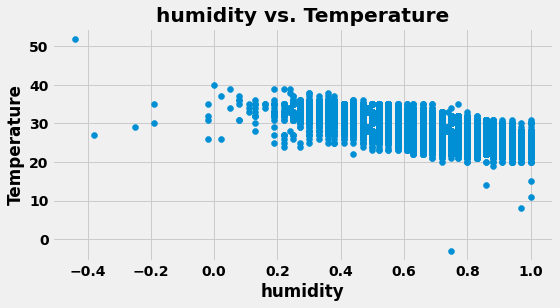

In [14]:
pred_temp = run_lin_reg(X, y)

- The variable with highest beta coefficient is ``humidity``, with a coefficient of -10.9. 
- Since the coefficient is negative, humidity and temperature are inversely proportional. The lower the humidity, the higher the temperature. The higher the humidity, the lower the temperature.
- This relationship makes sense because the drier the air (lower humidity), the hotter it is (higher temperature) and the wetter the air (higher humidity), the colder it is (lower temperature).

## v.2 Baseline model (using only `wind_direction`, `wind_speed`, `sea_level_pressure`, `visibility`, `humidity`) + one-hot encoded `clouds` as features

#### 3.2 Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature. ( 4pts )
#### 4.2 Show the relationship between the variable with the highest beta coefficient and temperature (Use a plot). ( 5pts )
#### 5.2 Solve for the Mean Squared Error of your predicted temperature against the actual temperature. ( 2pts )
#### 6.2 Solve for the R^2 score of the linear model used to predict temperature. ( 2pts )
#### 7.2 Identify if the model is a good model and why. ( 3pts )

Let's include categorical feature ``clouds`` in the model to see if it improves performance. 

**clouds** is the station observed cloud report & can have the ff. values:
* CLR-CLEAR 
* SCT-SCATTERED
* BKN-BROKEN
* OVC-OVERCAST, 
* OBS-OBSCURED
* POB-PARTIAL OBSCURATION 

Let's check the distribution of the data for ``clouds``.

In [15]:
df['clouds'].value_counts()

OVC    44695
BKN    32618
SCT    13056
***      102
CLR       76
OBS       18
Name: clouds, dtype: int64

There are many observations for OVC (overcast / cloudy), BKN (broken / partly cloudy or partly sunny to mostly cloudy), and SCT (scattered / partly cloudy or partly sunny), but only a few observations for CLR (clear / sunny), OBS (obscured), and *** (whatever that means, whether it represents POB or missing values).

I'm not sure what *** indicates. Maybe it's a typo and refers to POB or Partial Obscuration. Or maybe it was used to indicate missing values.

Let's encode the feature ``clouds`` using one-hot.

In [16]:
pd.get_dummies(df['clouds'], prefix='clouds')

clouds_***  clouds_BKN  clouds_CLR  clouds_OBS  clouds_OVC  clouds_SCT
0               0           1           0           0           0           0
1               0           0           0           0           1           0
2               0           1           0           0           0           0
3               0           0           0           0           1           0
4               0           1           0           0           0           0
...           ...         ...         ...         ...         ...         ...
90560           0           1           0           0           0           0
90561           0           1           0           0           0           0
90562           0           1           0           0           0           0
90563           0           1           0           0           0           0
90564           0           1           0           0           0           0

[90565 rows x 6 columns]

In [17]:
X = df.drop(['altitude', 'precipitation', 'gust_speed', 
             'datetime', 'clouds',
             'temperature'],
           axis=1)

X = X.join(pd.get_dummies(df['clouds'], prefix='clouds'))
y = df['temperature']

X.head()

wind_direction  wind_speed  sea_level_pressure  visibility  humidity  \
0             160           2              1007.7        15.6      0.75   
1               0           0              1011.3         6.2      0.94   
2             360           9              1004.1         6.2      0.80   
3             360          21              1006.3         6.2      0.80   
4               0           0              1010.1        11.2      0.88   

   clouds_***  clouds_BKN  clouds_CLR  clouds_OBS  clouds_OVC  clouds_SCT  
0           0           1           0           0           0           0  
1           0           0           0           0           1           0  
2           0           1           0           0           0           0  
3           0           0           0           0           1           0  
4           0           1           0           0           0           0

(3) Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature.

Linear regression coefficients: [ 1.57300376e-03  8.33329681e-02 -8.11750272e-05  1.18952847e-01
 -1.10033311e+01  8.86163534e-01  4.27618622e-01 -1.37078240e+00
 -4.23601265e-01  4.51865163e-01  2.87363490e-02]

Linear regression coefficients by feature: 
                     0          1
0       wind_direction   0.001573
1           wind_speed   0.083333
2   sea_level_pressure  -0.000081
3           visibility   0.118953
4             humidity -11.003331
5           clouds_***   0.886164
6           clouds_BKN   0.427619
7           clouds_CLR  -1.370782
8           clouds_OBS  -0.423601
9           clouds_OVC   0.451865
10          clouds_SCT   0.028736


(4) Show the relationship between the variable with the highest beta coefficient and temperature.

The strongest predictor of temperature among the features used is humidity with a beta coefficient of -11.003331113313696

(

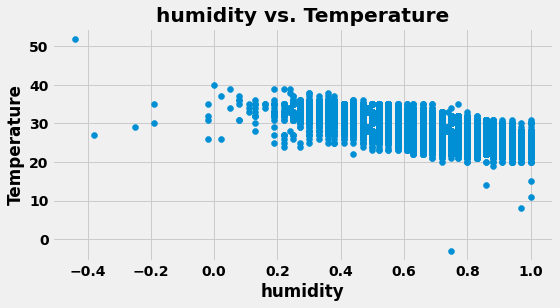

In [18]:
pred_temp = run_lin_reg(X, y)

## v.3 Baseline model (using only `wind_direction`, `wind_speed`, `sea_level_pressure`, `visibility`, `humidity`) + one-hot encoded `clouds` + features extracted from `datetime`

#### 3.3 Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature. ( 4pts )
#### 4.3 Show the relationship between the variable with the highest beta coefficient and temperature (Use a plot). ( 5pts )
#### 5.3 Solve for the Mean Squared Error of your predicted temperature against the actual temperature. ( 2pts )
#### 6.3 Solve for the R^2 score of the linear model used to predict temperature. ( 2pts )
#### 7.3 Identify if the model is a good model and why. ( 3pts )

Let's include features extracted from``datetime`` in the model to see if it improves performance.

In [19]:
df.head()

datetime  wind_direction  wind_speed  gust_speed  sea_level_pressure  \
0  197809140300             160           2         NaN              1007.7   
1  197810021500               0           0         NaN              1011.3   
2  197810252100             360           9         NaN              1004.1   
3  197810260000             360          21         NaN              1006.3   
4  197811131500               0           0         NaN              1010.1   

   temperature  altitude  precipitation clouds  visibility  humidity  
0           30       NaN            NaN    BKN        15.6      0.75  
1           26       NaN            NaN    OVC         6.2      0.94  
2           26       NaN            NaN    BKN         6.2      0.80  
3           26       NaN            NaN    OVC         6.2      0.80  
4           26       NaN            NaN    BKN        11.2      0.88

We can convert ``datetime`` to its proper data type (datetime64) and set it as the index.

In [20]:
df['datetime'] = pd.to_datetime(df['datetime'], format=('%Y%m%d%H%S'))
df.set_index('datetime', inplace=True)

Then, we can extract features from datetime, e.g. ``year``, ``month``, ``quarter``, and ``hour``.

In [21]:
df['year'] = df.index.year
df['month'] = df.index.month
df['quarter'] = df.index.quarter
df['hour'] = df.index.hour
df

wind_direction  wind_speed  gust_speed  \
datetime                                                      
1978-09-14 03:00:00             160           2         NaN   
1978-10-02 15:00:00               0           0         NaN   
1978-10-25 21:00:00             360           9         NaN   
1978-10-26 00:00:00             360          21         NaN   
1978-11-13 15:00:00               0           0         NaN   
...                             ...         ...         ...   
2018-09-01 09:00:00               0           0         NaN   
2018-09-01 12:00:00              70           4         NaN   
2018-09-01 15:00:00              70           4         NaN   
2018-09-01 18:00:00             340           7         NaN   
2018-09-01 21:00:00              40           4         NaN   

                     sea_level_pressure  temperature  altitude  precipitation  \
datetime                                                                        
1978-09-14 03:00:00              1007.7           30       NaN            NaN   
1978-10-02 15:00:00              1011.3           26       NaN            NaN   
1978-10-25 21:00:00              1004.1           26       NaN            NaN   
1978-10-26 00:00:00              1006.3           26       NaN            NaN   
1978-11-13 15:00:00              1010.1           26       NaN            NaN   
...                                 ...          ...       ...            ...   
2018-09-01 09:00:00              1007.0           28       NaN            NaN   
2018-09-01 12:00:00              1008.1           28       NaN            NaN   
2018-09-01 15:00:00              1008.9           27       NaN            NaN   
2018-09-01 18:00:00              1007.9           27       NaN            NaN   
2018-09-01 21:00:00              1007.1           26       NaN            NaN   

                    clouds  visibility  humidity  year  month  quarter  hour  
datetime                                                                      
1978-09-14 03:00:00    BKN        15.6      0.75  1978      9        3     3  
1978-10-02 15:00:00    OVC         6.2      0.94  1978     10        4    15  
1978-10-25 21:00:00    BKN         6.2      0.80  1978     10        4    21  
1978-10-26 00:00:00    OVC         6.2      0.80  1978     10        4     0  
1978-11-13 15:00:00    BKN        11.2      0.88  1978     11        4    15  
...                    ...         ...       ...   ...    ...      ...   ...  
2018-09-01 09:00:00    BKN         7.5      0.80  2018      9        3     9  
2018-09-01 12:00:00    BKN         7.5      0.86  2018      9        3    12  
2018-09-01 15:00:00    BKN         7.5      0.80  2018      9        3    15  
2018-09-01 18:00:00    BKN         7.5      0.77  2018      9        3    18  
2018-09-01 21:00:00    BKN         7.5      0.80  2018      9        3    21  

[90565 rows x 14 columns]

In [22]:
X = df.drop(['altitude', 'precipitation', 'gust_speed', 
             'clouds',
              'year', 'month', 'quarter', 'hour',
             'temperature'],
           axis=1)

y = df['temperature']

In [23]:
X = X.join(pd.get_dummies(df['clouds'], prefix='clouds'))

Let's create a new numeric feature for # years since 1978.

In [24]:
X['year_since_1978'] = df['year'].astype('int64') - 1978

Let's try using one-hot encoding for ``clouds``, ``month``,  ``quarter``, and ``hour``.

In [25]:
X = X.join(pd.get_dummies(df['month'], prefix='month'))
X = X.join(pd.get_dummies(df['quarter'], prefix='quarter'))
X = X.join(pd.get_dummies(df['hour'], prefix='hour'))
X.head()

wind_direction  wind_speed  sea_level_pressure  \
datetime                                                              
1978-09-14 03:00:00             160           2              1007.7   
1978-10-02 15:00:00               0           0              1011.3   
1978-10-25 21:00:00             360           9              1004.1   
1978-10-26 00:00:00             360          21              1006.3   
1978-11-13 15:00:00               0           0              1010.1   

                     visibility  humidity  clouds_***  clouds_BKN  clouds_CLR  \
datetime                                                                        
1978-09-14 03:00:00        15.6      0.75           0           1           0   
1978-10-02 15:00:00         6.2      0.94           0           0           0   
1978-10-25 21:00:00         6.2      0.80           0           1           0   
1978-10-26 00:00:00         6.2      0.80           0           0           0   
1978-11-13 15:00:00        11.2      0.88           0           1           0   

                     clouds_OBS  clouds_OVC  clouds_SCT  year_since_1978  \
datetime                                                                   
1978-09-14 03:00:00           0           0           0                0   
1978-10-02 15:00:00           0           1           0                0   
1978-10-25 21:00:00           0           0           0                0   
1978-10-26 00:00:00           0           1           0                0   
1978-11-13 15:00:00           0           0           0                0   

                     month_1  month_2  month_3  month_4  month_5  month_6  \
datetime                                                                    
1978-09-14 03:00:00        0        0        0        0        0        0   
1978-10-02 15:00:00        0        0        0        0        0        0   
1978-10-25 21:00:00        0        0        0        0        0        0   
1978-10-26 00:00:00        0        0        0        0        0        0   
1978-11-13 15:00:00        0        0        0        0        0        0   

                     month_7  month_8  month_9  month_10  month_11  month_12  \
datetime                                                                       
1978-09-14 03:00:00        0        0        1         0         0         0   
1978-10-02 15:00:00        0        0        0         1         0         0   
1978-10-25 21:00:00        0        0        0         1         0         0   
1978-10-26 00:00:00        0        0        0         1         0         0   
1978-11-13 15:00:00        0        0        0         0         1         0   

                     quarter_1  quarter_2  quarter_3  quarter_4  hour_0  \
datetime                                                                  
1978-09-14 03:00:00          0          0          1          0       0   
1978-10-02 15:00:00          0          0          0          1       0   
1978-10-25 21:00:00          0          0          0          1       0   
1978-10-26 00:00:00          0          0          0          1       1   
1978-11-13 15:00:00          0          0          0          1       0   

                     hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  \
datetime                                                                      
1978-09-14 03:00:00       0       0       1       0       0       0       0   
1978-10-02 15:00:00       0       0       0       0       0       0       0   
1978-10-25 21:00:00       0       0       0       0       0       0       0   
1978-10-26 00:00:00       0       0       0       0       0       0       0   
1978-11-13 15:00:00       0       0       0       0       0       0       0   

                     hour_8  hour_9  hour_10  hour_11  hour_12  hour_13  \
datetime                                                                  
1978-09-14 03:00:00       0       0        0        0        0        0   
1978-10-02 15:00

(3) Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature.

Linear regression coefficients: [ 5.60887589e-04  4.93944739e-03  2.24395151e-05  3.73984315e-03
 -1.00948797e+01  2.91691654e-01  2.71316647e-01 -7.93153931e-01
 -5.42129992e-02  7.33222621e-03  2.77026403e-01  1.04537519e-02
 -7.82577928e-01 -5.51301037e-01  2.92562046e-01 -2.14499522e-01
  5.57548850e-01  4.31430052e-01  2.36366357e-01  1.45838489e-01
  1.19352358e-01  5.98663720e-01  7.65070244e-02 -9.09890408e-01
 -1.04131692e+00  7.74479379e-01  5.01557203e-01 -2.34719663e-01
  1.25857096e-03  1.63110832e-01 -1.20570507e-01  1.11720194e+00
  7.46170897e-02  1.39969264e-02  1.65053370e+00  1.62491175e-01
  1.84181636e-01  1.23362769e+00 -3.47208013e-01  9.92475393e-03
  3.77126553e-01 -1.07861042e-01 -3.93072738e-01 -6.84403802e-02
 -2.26918708e-01 -1.39653085e-01 -4.29492191e-01 -4.85919480e-01
 -7.17042400e-01 -7.26876775e-01 -4.96153599e-01 -7.28861956e-01]

Linear regr

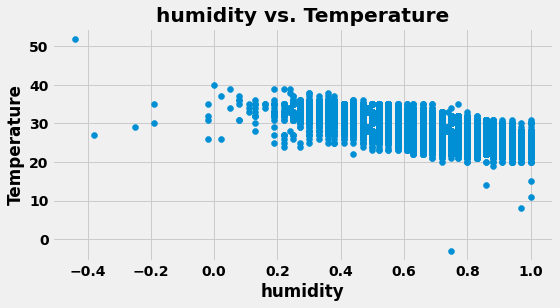

In [26]:
pred_temp = run_lin_reg(X, y)

## Model Versions Summary

v.1 Baseline model (using only wind_direction, wind_speed, sea_level_pressure, visibility, humidity) as features
- RMSE of 1.664
- R^2 score of 0.4725

v.2 Baseline model (using only wind_direction, wind_speed, sea_level_pressure, visibility, humidity) + one-hot encoded clouds as features
- RMSE of  1.657 
- R^2 score of 0.4766
- Including one-hot encoded clouds slightly improved the model performance by 0.004 when compared to v.1

v.3 Baseline model (using only wind_direction, wind_speed, sea_level_pressure, visibility, humidity) + one-hot encoded clouds + features extracted from datetime
- RMSE of 1.156
- R^2 score of 0.7456
- Including datetime features significantly improved the model performance by 0.269 when compared to v.2